# Prediccion y Clasificación de Alquileres en Madrid

-  Proyecto orientado al analisis, prediccion y clasificacion de alquileres en la provincia de Madrid mediante tecnicas de ciencia de datos y machine learning.

Objetivos principales:
- Predecir el precio de alquiler de una vivienda (tarea de regresion).
- Predecir si un inmueble dispone de balcon (tarea de clasificacion).

Índice del notebook

## 1. Inicio y Configuración

#### Importacion de librerias

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import sklearn, os, sys
print("sklearn:", sklearn.__version__, sklearn.__file__)
print("cwd:", os.getcwd())
print("archivos cwd:", os.listdir('.'))

sklearn: 1.8.0 c:\Users\marco\Desktop\Master IA y Big Data\Temas-Codigo\MODULO 2\proyectos\hito2\.venv\Lib\site-packages\sklearn\__init__.py
cwd: c:\Users\marco\Desktop\Master IA y Big Data\Temas-Codigo\MODULO 2\proyectos\hito2
archivos cwd: ['.python-version', '.venv', 'entrega2.ipynb', 'idealista-madrid.csv', 'main.py', 'pyproject.toml', 'README.md', 'requirements.txt', 'uv.lock']


In [1]:
# TRAIN  -TEST - METRICAS
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,  confusion_matrix, classification_report,balanced_accuracy_score,r2_score,mean_absolute_error, mean_squared_error
)

NameError: name 'BaseSearchCV' is not defined

In [ ]:
# PREPROCESAMIENTO 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer
from sklearn.preprocessing import(MinMaxScaler, OneHotEncoder, StandardScaler,RobustScaler,PowerTransformer,QuantileTransformer)
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import FunctionTransformer
from sklearn import clone

In [ ]:
# MODELOS CLASIFICACION
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
# MODELO REGRESION
from sklearn.linear_model import LinearRegression

# VALIDACION CRUZADA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_validate


NameError: name 'BaseSearchCV' is not defined

### Carga del dataset

In [2]:
df = pd.read_csv('idealista-madrid.csv')
df.sample(n=3)

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,terrace,balcony,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update
5921,99079842,https://www.idealista.com/en/inmueble/99079842/,Flat / apartment for rent in calle de Juan Per...,Flat,1100,NaN,False,Housfy Alquiler,95,79.0,...,False,True,False,False,False,"Calle de Juan Perez Almeida, Subdistrict Comil...",Carabanchel,Comillas,28019.0,31 October
861,39861421,https://www.idealista.com/en/inmueble/39861421/,Flat / apartment for rent in Las Tablas,Flat,900,NaN,False,Promora Las Tablas,54,NaN,...,False,False,True,False,False,", Subdistrict Las Tablas, District Fuencarral,...",Fuencarral,Las Tablas,28034.0,7 November
8204,97416760,https://www.idealista.com/en/inmueble/97416760/,Flat / apartment for rent in calle de Sagasta,Flat,3350,NaN,False,Js gestion inmobiliaria,120,110.0,...,True,False,False,False,False,"Calle de Sagasta, Subdistrict Chueca-Justicia,...",Centro,Chueca-Justicia,28004.0,21 April


## 2. Entendimiento de los Datos

### Inspeccion del DataSet

In [3]:
df.head(1)

,web_id,url,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,...,terrace,balcony,storeroom,swimming_pool,garden_area,location,district,subdistrict,postalcode,last_update
0,99439319,https://www.idealista.com/en/inmueble/99439319/,"Flat / apartment for rent in pablo luna, 4",Flat,1400,NaN,False,Silcasas Ochocientas,60,NaN,...,True,False,False,False,False,"pablo luna, 4, Subdistrict Castilla, District ...",Chamartín,Castilla,28046.0,7 November


- tipos de datos

In [4]:
print(
    f"DATA FRAME\n"
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )

print(df.dtypes.to_frame(name="TIPOS DE DATOS"))

DATA FRAME
Numero de filas y columnas:(9229, 32)
Numero total de elementos : 295328
 
                  TIPOS DE DATOS
web_id                     int64
url                          str
title                        str
type                         str
price                      int64
deposit                  float64
private_owner               bool
professional_name            str
floor_built                int64
floor_area               float64
floor                        str
year_built               float64
orientation                  str
bedrooms                   int64
bathrooms                  int64
second_hand                 bool
lift                        bool
garage_included             bool
furnished                   bool
equipped_kitchen            bool
fitted_wardrobes            bool
air_conditioning            bool
terrace                     bool
balcony                     bool
storeroom                   bool
swimming_pool               bool
garden_area            

### Redimensionamiento dataset

- Eliminamos columnas no utiles para el proyecto.

In [5]:
# hacemos una copia del df original y realizamos el drop de la columna que no queremos y mostramos el resultado
df_copy = df.copy()

cols_a_eliminar = ["location", "web_id", "url", "subdistrict"] 
df_new = df_copy.drop(columns=cols_a_eliminar)

df_new.columns.to_list()


['title',
 'type',
 'price',
 'deposit',
 'private_owner',
 'professional_name',
 'floor_built',
 'floor_area',
 'floor',
 'year_built',
 'orientation',
 'bedrooms',
 'bathrooms',
 'second_hand',
 'lift',
 'garage_included',
 'furnished',
 'equipped_kitchen',
 'fitted_wardrobes',
 'air_conditioning',
 'terrace',
 'balcony',
 'storeroom',
 'swimming_pool',
 'garden_area',
 'district',
 'postalcode',
 'last_update']

In [6]:
# solo dtypes numéricos
df_new.select_dtypes(include='number').dtypes

price            int64
deposit        float64
floor_built      int64
floor_area     float64
year_built     float64
bedrooms         int64
bathrooms        int64
postalcode     float64
dtype: object

### Revision NULOS - VALORES OCULTOS -  ESPACIOS EN BLANCOS - VALORES = 0
  - comprobamos si hay VALORES NULOS  en todo el dataframe reduced
  - comprobamos si hay ESPACIOS EN BLANCO en todo el dataframe reduced
  - comprobamos si hay VALORES OCULTOS  en todo el dataframe reduced
  - comprobamos si hay VALORES IGUAL A ZEROS en todo el dataframe reduced

In [7]:
df_nulos = pd.DataFrame({    
    'nulos': df_new.isna().sum()                                                        # muestra la suma de los nulos o faltantes contenidos en las columnas 
})

df_espacios = pd.DataFrame({
    "espacios": df_new.apply(lambda col: col.astype(str).str.strip().eq("").sum())      # muestra la suma de celdas con espacios vacios
})

valores_ocultos = ["", " ", "NA", "N/A", "na", "null", "None", "?", ".", "0"]

df_ocultos = pd.DataFrame({ 
    'ocultos': df_new.apply(lambda col: col.astype(str).isin(valores_ocultos).sum()) })  #  trasforma todas las columnas en string para poder comparar con valores_ocultos 

df_zeros= pd.DataFrame({
    "valores  = 0 ":df_new.apply( lambda col: (col == 0).sum())                           # suma todos los valores iguales a zeros de todas las columnas
})

df_Nan= pd.concat([df_nulos, df_espacios, df_ocultos, df_zeros], axis=1)
df_Nan

,nulos,espacios,ocultos,valores = 0
title,0,0,0,0
type,0,0,0,0
price,0,0,0,0
deposit,3822,0,0,0
private_owner,0,0,0,7622
professional_name,1607,0,0,0
floor_built,0,0,9,9
floor_area,5291,0,0,1
floor,321,0,0,0
year_built,6336,0,0,0


- El DataFrame muestra que el DataSet presenta variedad de valores respecto a: nulos , valor a zero, y oculto. 
  Hay feature que presentan valores a 0 que interpretamos que es debido a que no existe esta caracteristica en los piso ( ejemplo: garden_area) y habar que tenerlo presente en nuestro estudio y valorar como tratar estos datos.

- mostramos las filas cuyos valores sean indenticos en sus columnas.

In [8]:
num_cols = df_new.select_dtypes(include='number').columns.tolist()  # seleccion de columnas numericas.

df_new.groupby(num_cols).size().reset_index(name='count').query('count > 1').sort_values('count', ascending=False) # agrupamos los valores repetidos y los ordenamos.

,price,deposit,floor_built,floor_area,year_built,bedrooms,bathrooms,postalcode,count
86,850,1.0,56,52.0,1961.0,2,1,28042.0,2
337,1350,2.0,95,80.0,1962.0,2,1,28008.0,2
448,1750,1.0,159,129.0,2004.0,4,3,28222.0,2
521,2230,1.0,57,56.0,1903.0,1,1,28010.0,2
538,2300,3.0,136,118.0,1971.0,4,3,28046.0,2


- Resultado: tenemos 5 grupos con un total de 10 filas repetidas. El modelo no se verá afectado por estas cantidades.

In [9]:
# solo dtypes string
df_new.select_dtypes(include='str').dtypes

title                str
type                 str
professional_name    str
floor                str
orientation          str
district             str
last_update          str
dtype: object

## 3. EDA

### VALORES NUMERICOS
Tabla de estadisticos principal para ver centralidad y dispercion

Renombramos las descripciones, para practicar realizar el diccionario y para que se lea mas rapido en español.

In [10]:
# describir solo las numéricas
df_new.describe(include='number').round(3)

,price,deposit,floor_built,floor_area,year_built,bedrooms,bathrooms,postalcode
count,9229.000,5407.000,9229.000,3938.000,2893.000,9229.000,9229.000,6834.000
mean,1937.996,1.471,110.285,94.357,1975.492,2.260,1.788,28076.948
std,1615.063,0.622,87.184,72.823,34.929,1.333,1.077,171.686
min,400.000,1.000,0.000,0.000,1800.000,0.000,1.000,28001.000
25%,1000.000,1.000,60.000,54.000,1960.000,1.000,1.000,28009.000
50%,1400.000,1.000,85.000,75.000,1978.000,2.000,2.000,28023.000
75%,2300.000,2.000,127.000,110.000,2003.000,3.000,2.000,28043.000
max,25000.000,6.000,990.000,995.000,2022.000,25.000,20.000,28950.000


 REPORT columnas numericas:
- en 'price' existe una diferencia significativa entre media y mediana, confirmandono presencia de valores outliers. El rango entre valores min y max es dispar. La desviacion estandar tiene un valor muy elevado respecto a la media( aprox. 83%) que tendremos que tener en cuenta y tratar.
- en 'deposit' faltan muchos registros y presenta una desviacion elevada. No es un dato util para el modelo y es cuestionable si utilizarlo o no. 
- en 'floor_built' presentan valores minimos a 0. Como revisamos anteriormente, hemos comprobado que solo afecta a 9 registros, que resultan de escasa importancia.Solo abria que comprobar que este 0 sea un por ejemplo un Bajo.  Media y mediana estan relativamente cerca y no hay mucha desviacion.
- en 'floor area' faltan muchos registros, y esto puede ser un problema por ser factor de peso para la predicción del  precio y la variable 'balcony'.
- 'floor_built" e "floor_area" tienen valores muy parecido, pero en 'area' faltan muchos datos. Podriamos utilizar una valoracion cruzada, utilizando solo 'floor_build" para evitar introducir datos innecesarios al modelo.
- en 'years' a destacar la falta elevada de registros y podria ser un dato importante para el estudio. Una posible solucion seria la discretizacion en categorias ("pre_guerra" ,"Antiguos", "Moderno" , " Desconocido" )
- en ' bethroom' y 'bathroom' hay valores maximos muy altos, Habria que revisar de que se trata, probablemente son errores. Estos valroes sesgaria mucho el modelo. Habria que corregirlos o eliminarlos.
- en ' postalcode'  a destacar que faltan datos y podriamos realizar tal vez una extrapolacion de otra feature de tipo categorica que tenemos disponible(' location') que en caso fuera necesario podriamos realizar la operacion.

CONCLUSION: 
Es importante tener en cuenta la lata dispercion en el precio ( un 83% de la media).
Revisar los valores maximo de bethrooms y bathrooms.
La falta de datos en 'years' es critica , siendo importante para una predicción en el precio.
Considerar la idea de utilizar solo floor_built para evitar introducir demasiados datos al modelo que no sean necesarios. 

#### ANALISIS VARIABLE OBJETIVO 'price'

Outliers detectados: 551 (5.97%)


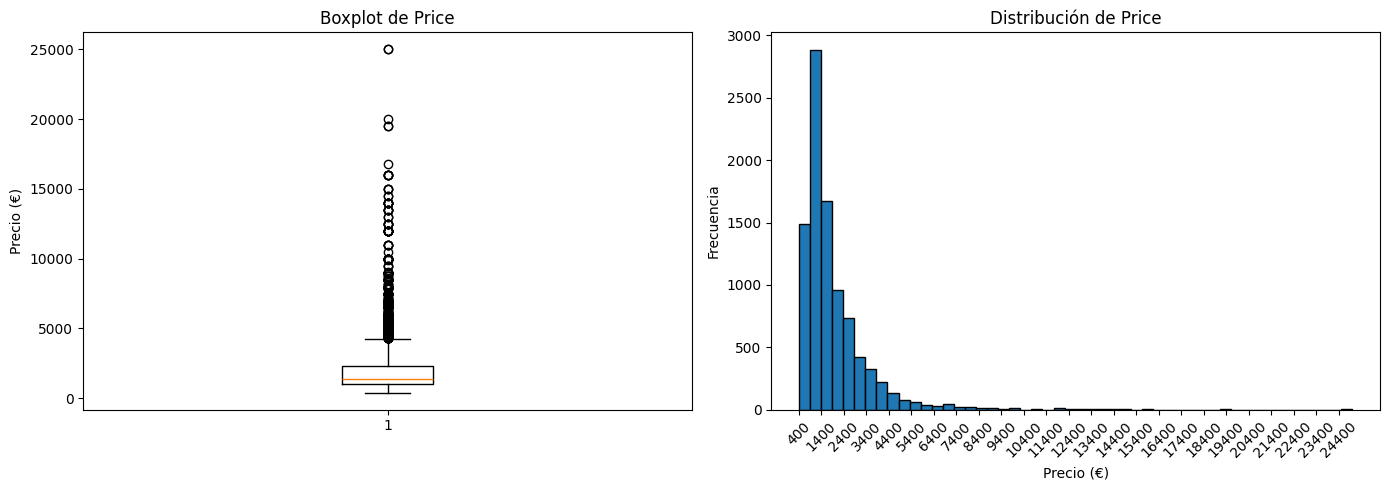


Límite inferior: -950.00€
Límite superior: 4250.00€

Precio mínimo: 400€
Precio máximo: 25000€

Precio medio: 1938.00€
Precio mediano: 1400.00€


In [55]:
# Método 1: Rango intercuartílico (IQR)
Q1 = df_new['price'].quantile(0.25)
Q3 = df_new['price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_new[(df_new['price'] < limite_inferior) | (df_new['price'] > limite_superior)]
print(f"Outliers detectados: {len(outliers)} ({len(outliers)/len(df_new)*100:.2f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
axes[0].boxplot(df_new['price'].dropna())
axes[0].set_title('Boxplot de Price')
axes[0].set_ylabel('Precio (€)')

# Histograma
axes[1].hist(df_new['price'].dropna(), bins=50, edgecolor='black')
axes[1].set_title('Distribución de Price')
axes[1].set_xlabel('Precio (€)')
axes[1].set_ylabel('Frecuencia')
plt.xticks(range(400, 25000, 1000), rotation=45)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print(f"\nLímite inferior: {limite_inferior:.2f}€")
print(f"Límite superior: {limite_superior:.2f}€")
print(f"\nPrecio mínimo: {df_new['price'].min()}€")
print(f"Precio máximo: {df_new['price'].max()}€")
print(f"\nPrecio medio: {df_new['price'].mean():.2f}€")
print(f"Precio mediano: {df_new['price'].median():.2f}€")


CONCLUSIONES: 
El grafico de la distribucion muestra claramente una asimetrica, con cola hacia la derecha como hay que esperar.
El bopx-plot muestra claramente los outliers. Mantendremos todos los registros y en un primer momento no ivestigaremso si son errores, pero se trataran con una Trasformacion Logaritmica en el Pipeline que costruiremos para el modelo, para reducir su influencia sin eliminarlos y ademas utilizaremos un modelo mas robusto como RobustScaler utilizando la mediana en vez de la media.

#### Graficos Variables Numericas

Despues del analisis realizado previamente, elegimos las siguientes varables: 'floor-built' / 'bedrooms' / 'bathrooms' / 'years_built'

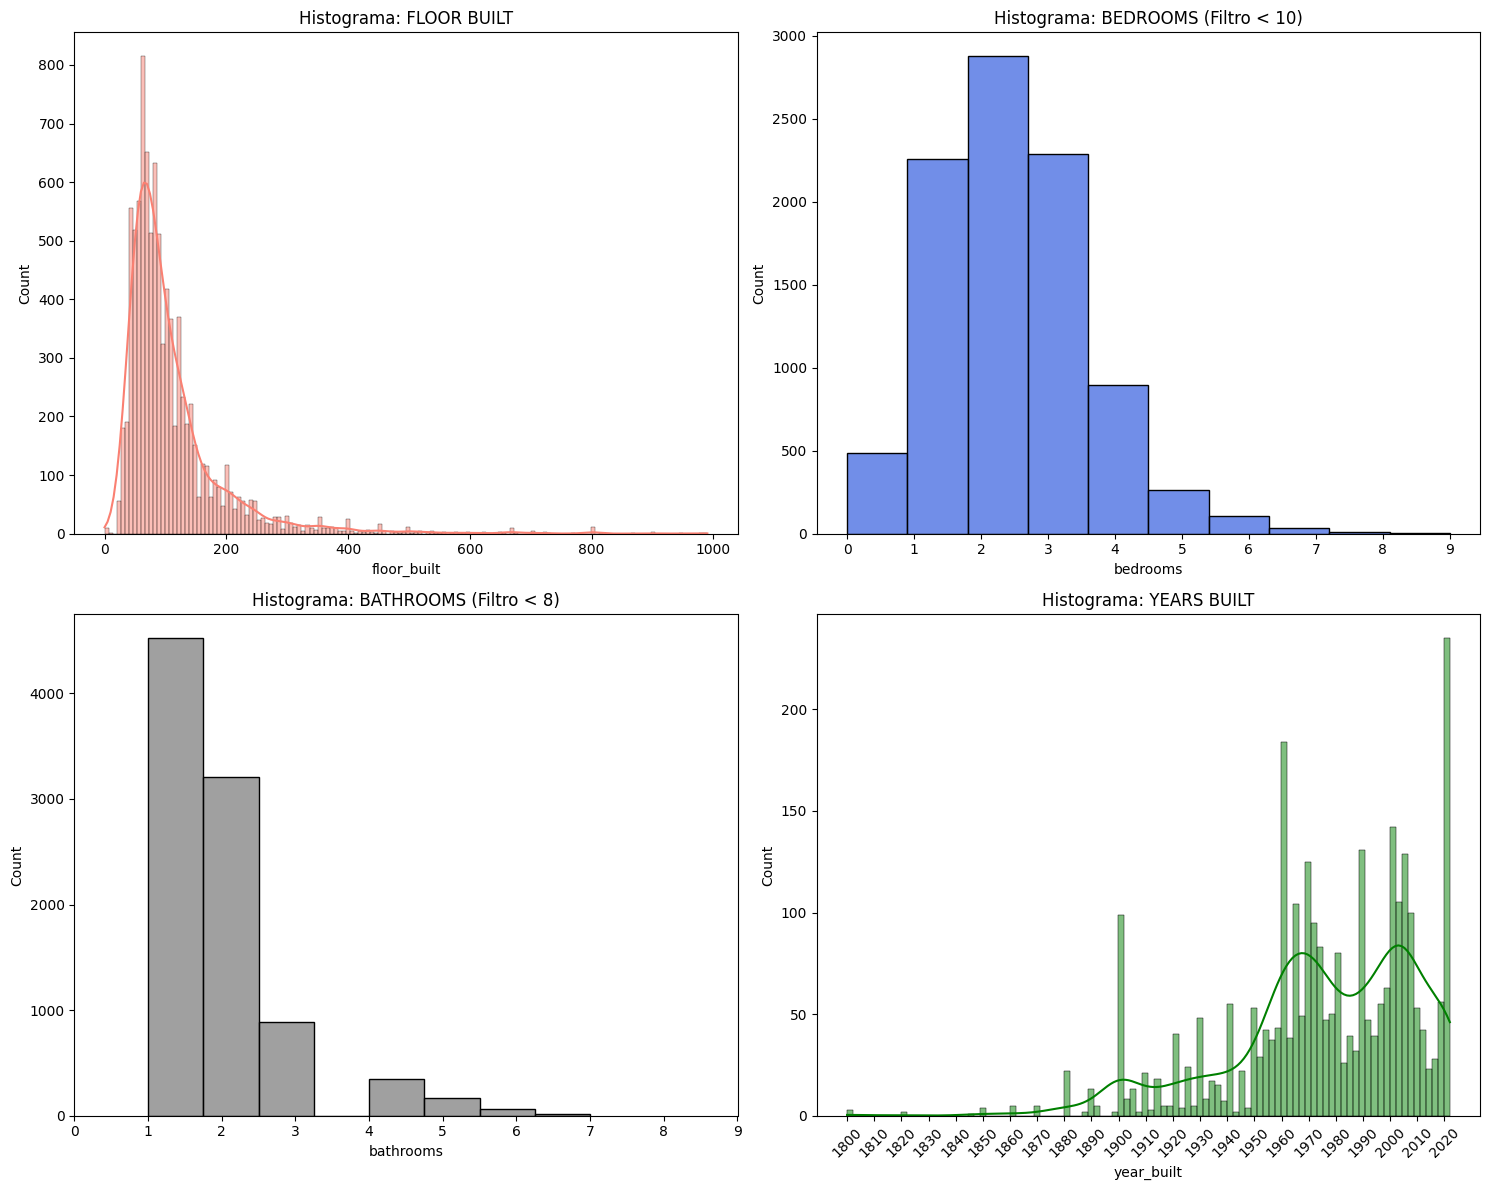

In [42]:
plt.figure(figsize=[15,12])

# Subplot FLOOR BUILT
plt.subplot(2,2,1)
sns.histplot(data=df_new, x='floor_built', bins=150, kde=True, color='salmon')
plt.title('Histograma: FLOOR BUILT')

# Subplot BEDROOM
plt.subplot(2,2,2)
sns.histplot(data=df_new[df_new['bedrooms'] < 10], x='bedrooms', bins=10, kde=False, color='royalblue')
plt.title('Histograma: BEDROOMS (Filtro < 10)')
plt.xticks(range(0, 10, 1))

# Subplot BATHROOM
plt.subplot(2,2,3)
sns.histplot(data=df_new[df_new['bathrooms'] < 8], x='bathrooms', bins=8, kde=False, color='gray')
plt.title('Histograma: BATHROOMS (Filtro < 8)')
plt.xticks(range(0, 10, 1))

# Subplot YEAR
plt.subplot(2,2,4)
sns.histplot(data=df_new, x='year_built', bins=100, kde=True, color='green')
plt.title('Histograma: YEARS BUILT')
plt.xticks(range(1800, 2030, 10), rotation=45)

plt.tight_layout()
plt.show()

Mas detalle para el grafico de superficie costruidas.

(0.0, 400.0)

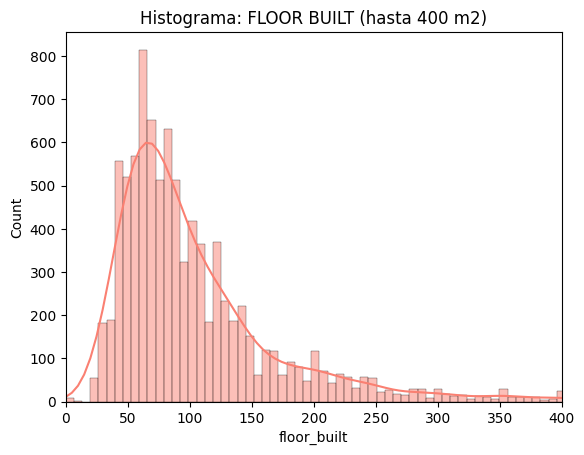

In [ ]:
sns.histplot(data=df_new, x='floor_built', bins=150, kde=True, color='salmon')
plt.title('Histograma: FLOOR BUILT (hasta 400 m2)')
plt.xlim(0, 400)

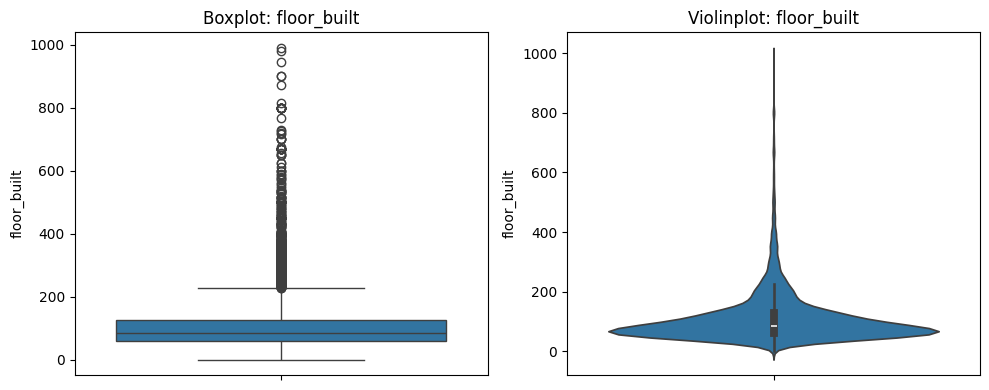

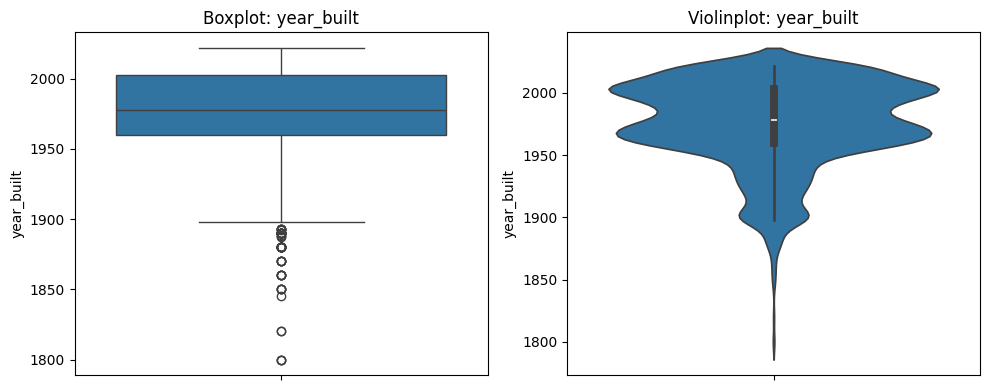

In [70]:
columnas_seleccionadas = ['floor_built','year_built']

for i in columnas_seleccionadas:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))      
    
    # Boxplot
    sns.boxplot(data=df_new, y=i, ax=axs[0])
    axs[0].set_title(f'Boxplot: {i}')
        
    # Violinplot
    sns.violinplot(data=df_new, y=i, ax=axs[1])
    axs[1].set_title(f'Violinplot: {i}')
    
    fig.tight_layout()
    plt.show()

CONCLUSIONES:   
- Los graficos de 'floor_built' muestran claramente una distribucion reducidas, asimetrica cuya media y mediana son muy parecida. Cosnidermoas los outliers no como errores , pero si se tendran en cuenta su tratamiento para evita sesgos que pueden afectar al modelo.
- Los graficos de ' years_built' tiene una distribucion a sierra, que muestra la evidencias de la tendencia de la oferta de alquiler de pisos que se concentra sobretodo en los de nnueva costruccion.
- No se han tratados features como bedrooms y barhroom porque cosideramos qeu no aportan mas inforamcion con graficos tipo plot.

Como inciden los outliers sobre el total de registros 

In [72]:
# función para cuantificar outliers (IQR)
def contar_outliers_iqr(df_new, cols=None, factor=1.5):
    cols = cols if cols is not None else df_new.select_dtypes(include=[np.number]).columns
    res = {}
    for c in cols:
        q1 = df_new[c].quantile(0.25)
        q3 = df_new[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - factor * iqr
        upper = q3 + factor * iqr
        mask = (df_new[c] < lower) | (df_new[c] > upper)
        res[c] = {'outliers / ud': int(mask.sum()), '%': round(mask.mean()*100,2)}   # mask (:boolean (si-no outliers)) / cuenta cuantos outlieres hay  # pct es el procentaje 
    return pd.DataFrame(res).T

contar_outliers_iqr(df_new, cols=['floor_built','year_built', 'bedrooms', 'bathrooms'])

,outliers / ud,%
floor_built,675.0,7.31
year_built,62.0,0.67
bedrooms,52.0,0.56
bathrooms,610.0,6.61


CONCLUSIONES:
- Los porcentajes más evidentes son en 'floor_built' y 'bathrooms' que aunque no sean porcentajes altos si es importante tenerlos en cuentas.
- Ambos podria tener logica, a mayor superficie mayor numeros de baños.Es importante considerarlo. Confirmamos la teoria con un ScatterPLot para confirmar que no hallan errores.
- La feature ' bedrooms' aunque no sea relevante, comprobaremos con un ScatterPLot para decir si conservar los registros o eliminarlos para evitar generar ruido en el modelo.
- La feature 'year_built' son irrisoria. Son los pisos muy antiguos y no es necesario eliminar.

Scaterplot floor_built vs Bathroom para detectar posibles errores

In [79]:
from scipy.stats import pearsonr

df_xy = df_new[['floor_built','bathrooms']].dropna()
X = df_xy['floor_built'].values.reshape(-1,1)
y = df_xy['bathrooms'].values

r, p = pearsonr(X.ravel(), y)
lr = LinearRegression().fit(X, y)
r2 = lr.score(X, y)


plt.figure(figsize=(8,5))
sns.scatterplot(data=df_new, x='floor_built', y='bathrooms', alpha=0.6, edgecolor='w', s=60)
sns.regplot(data=df_new, x='floor_built', y='bathrooms', scatter=False, color='red', lowess=True)
plt.xlim(0, 1000)  # opcional: ajustar según rango
plt.title('Scatter: floor_built vs bathrooms')
plt.xlabel('Superficie construida (m2)')
plt.ylabel('Número de baños')
plt.tight_layout()
plt.show()

NameError: name 'LinearRegression' is not defined

CONCLUSION: 

El grafico muestra una linea de tendencias positiva y bastante fuerte como es logico en este caso.
Presenta puntos muy alejados en los dos extremos de la linea, y mas acentuado en el extremo superior evidenciando errores de registros.
Estos errores es preferible elimarlos  

In [77]:
# Ver casas con menos de 50m2 pero más de 3 baños (Error probable)
errores_limpieza = df_new[(df_new['floor_built'] < 50) & (df_new['bathrooms'] > 3)]
print(errores_limpieza)

                                                  title      type  price  \
2838   Detached house for rent in Urb. somosaguas, S...  Detached  16800   
3034              Detached house for rent in Somosaguas  Detached   8500   
3285   Detached house for rent in Zona Carretera del...  Detached  16000   
3328   Detached house for rent in calle Encina Alam ...  Detached  15000   
4740        Detached house for rent in calle Amorebieta  Detached   6000   
7500      Detached house for rent in ronda de Sobradiel  Detached   9000   
7602      Detached house for rent in ronda de Sobradiel  Detached   9000   
7680   Detached house for rent in avenida de la Avut...  Detached  10000   
7716     Terraced house for rent in Conde Orgaz-Piovera  Terraced   6000   
8022                   Flat / apartment for rent in Sol      Flat   1290   

      deposit  private_owner                         professional_name  \
2838      2.0           True                                       NaN   
3034      NaN  

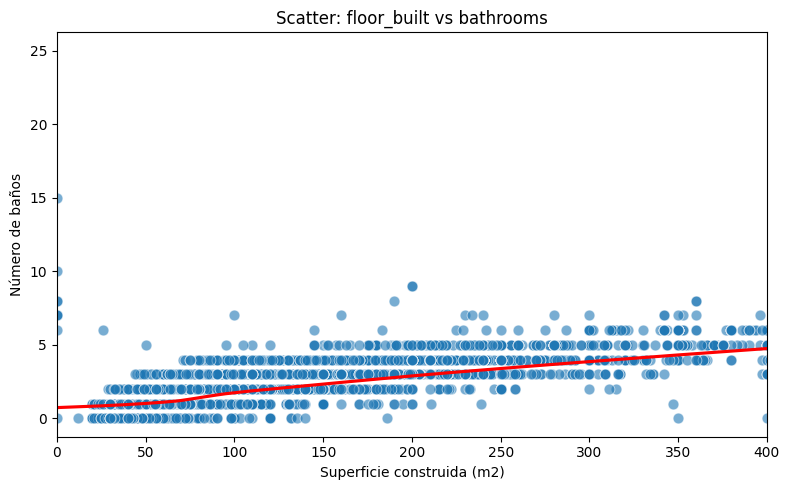

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_new, x='floor_built', y='bedrooms', alpha=0.6, edgecolor='w', s=60)
sns.regplot(data=df_new, x='floor_built', y='bathrooms', scatter=False, color='red', lowess=True)
plt.xlim(0, 400)  # opcional: ajustar según rango
plt.title('Scatter: floor_built vs bathrooms')
plt.xlabel('Superficie construida (m2)')
plt.ylabel('Número de baños')
plt.tight_layout()
plt.show()

Registros sospechosos: 38 / 9229 (0.41%)


,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,floor,year_built,...,fitted_wardrobes,air_conditioning,terrace,balcony,storeroom,swimming_pool,garden_area,district,postalcode,last_update
8174,Penthouse for rent in calle de Argensola,Penthouse,3350,NaN,False,Domus Aurea Capital,160,146.0,6th,1935.0,...,True,True,True,True,False,False,False,Centro,28004.0,1 October
4869,Detached house for rent in Valdemarín,Detached,16000,NaN,False,Engel & Völkers Madrid,500,NaN,NaN,NaN,...,True,True,True,False,True,False,False,Moncloa,28023.0,5 November
4775,Detached house for rent in El Plantío,Detached,10000,NaN,False,Feralba inmuebles,190,0.0,"1,190",NaN,...,False,False,False,False,False,True,False,Moncloa,28023.0,1 November
4661,Detached house for rent in El Plantío,Detached,6000,NaN,False,Promora Aravaca,900,NaN,NaN,1960.0,...,False,True,False,False,False,True,False,Moncloa,28023.0,3 November
3049,Detached house for rent in Prado Largo,Detached,9500,NaN,False,Promora Aravaca,200,NaN,NaN,NaN,...,False,True,False,False,True,True,False,Urbanizaciones,28223.0,11 August
3114,Detached house for rent in Prado Largo,Detached,9500,NaN,False,Domus Madrid Real Estate,200,199.0,"1,200",NaN,...,True,True,True,False,True,True,False,Urbanizaciones,28223.0,11 October
4913,House for rent in Ciudad Universitaria,House,12000,NaN,False,Berskhire Hathaway HomeServices Madrid,800,NaN,NaN,NaN,...,False,False,False,False,True,True,False,Moncloa,NaN,28 October
2838,"Detached house for rent in Urb. somosaguas, S...",Detached,16800,2.0,True,NaN,0,NaN,2,NaN,...,False,True,True,True,True,True,False,Somosaguas,28223.0,31 October
3285,Detached house for rent in Zona Carretera del...,Detached,16000,NaN,False,Engel & Völkers Madrid,0,900.0,"1,000",1980.0,...,True,True,True,True,True,True,False,Zona Carretera del Plantío,28221.0,3 November
3034,Detached house for rent in Somosaguas,Detached,8500,NaN,False,GV | Real Estate,0,NaN,3,NaN,...,True,False,True,False,True,True,False,Somosaguas,28223.0,26 July


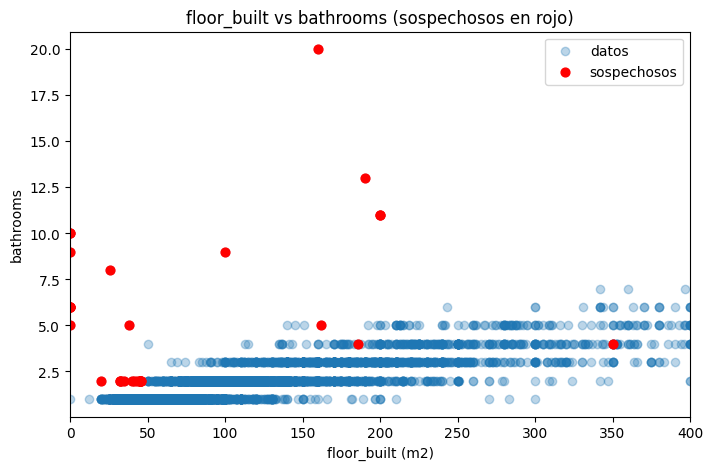

Después de reemplazar por mediana (ejemplo):


,title,type,price,deposit,private_owner,professional_name,floor_built,floor_area,floor,year_built,...,fitted_wardrobes,air_conditioning,terrace,balcony,storeroom,swimming_pool,garden_area,district,postalcode,last_update
607,Flat / apartment for rent in El Viso,Flat,4500,NaN,False,Promora Madrid,162,NaN,4th,NaN,...,False,True,False,False,True,False,False,Chamartín,NaN,7 November
1299,Flat / apartment for rent in calle de Valderribas,Flat,1750,1.0,False,Homelike,46,NaN,2nd,NaN,...,False,True,False,False,False,False,False,Retiro,NaN,3 November
1568,Flat / apartment for rent in calle de Ibiza,Flat,990,2.0,False,Inmobiliaria W,45,NaN,NaN,NaN,...,True,True,False,False,False,False,False,Retiro,NaN,6 November
1871,"Penthouse for rent in Virtudes, 6",Penthouse,850,2.0,False,SOÑAR CONTIGO,20,NaN,4th,1935.0,...,True,True,True,True,True,False,False,Chamberí,28010.0,6 November
2008,Studio flat for rent in calle de Modesto Lafue...,Studio,3000,2.0,True,NaN,350,NaN,ground,NaN,...,False,True,False,False,False,False,False,Chamberí,28003.0,5 September
2838,"Detached house for rent in Urb. somosaguas, S...",Detached,16800,2.0,True,NaN,0,NaN,2,NaN,...,False,True,True,True,True,True,False,Somosaguas,28223.0,31 October
3034,Detached house for rent in Somosaguas,Detached,8500,NaN,False,GV | Real Estate,0,NaN,3,NaN,...,True,False,True,False,True,True,False,Somosaguas,28223.0,26 July
3049,Detached house for rent in Prado Largo,Detached,9500,NaN,False,Promora Aravaca,200,NaN,NaN,NaN,...,False,True,False,False,True,True,False,Urbanizaciones,28223.0,11 August
3114,Detached house for rent in Prado Largo,Detached,9500,NaN,False,Domus Madrid Real Estate,200,199.0,"1,200",NaN,...,True,True,True,False,True,True,False,Urbanizaciones,28223.0,11 October
3285,Detached house for rent in Zona Carretera del...,Detached,16000,NaN,False,Engel & Völkers Madrid,0,900.0,"1,000",1980.0,...,True,True,True,True,True,True,False,Zona Carretera del Plantío,28221.0,3 November


In [74]:
# 1) detectar registros sospechosos
small_area = 50   # umbral en m2 para "superficie pequeña"
many_bath = 2     # umbral de baños que resulta sospechoso en superficies pequeñas

mask1 = (df_new['floor_built'].notna()) & (df_new['bathrooms'].notna()) & (df_new['floor_built'] < small_area) & (df_new['bathrooms'] >= many_bath)
mask2 = df_new['bathrooms'] > (df_new['bedrooms'] + 2)  # más baños que dormitorios + 2 -> sospechoso
mask3 = df_new['bathrooms'] > 8  # extremos claros

mask = mask1 | mask2 | mask3

print(f"Registros sospechosos: {mask.sum()} / {len(df_new)} ({mask.mean()*100:.2f}%)")
display(df_new.loc[mask].sort_values(['bathrooms','floor_built'], ascending=[False,True]).head(20))

# 2) visualización: marcar sospechosos en scatter
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df_new['floor_built'], df_new['bathrooms'], alpha=0.3, label='datos')
plt.scatter(df_new.loc[mask, 'floor_built'], df_new.loc[mask, 'bathrooms'], color='red', s=40, label='sospechosos')
plt.xlim(0, 400)
plt.xlabel('floor_built (m2)')
plt.ylabel('bathrooms')
plt.legend()
plt.title('floor_built vs bathrooms (sospechosos en rojo)')
plt.show()

# 3) opciones de corrección (elige una)
# Opción A: eliminar sospechosos
df_drop = df_new.loc[~mask].copy()

# Opción B: cap (winsor) baños a un máximo razonable según superficie
df_cap = df_new.copy()
df_cap.loc[df_cap['floor_built'] < small_area, 'bathrooms'] = df_cap.loc[df_cap['floor_built'] < small_area, 'bathrooms'].clip(upper=1)  # ejemplo: 1 baño máximo para <50m2

# Opción C: reemplazar por la mediana por nº de dormitorios
df_med = df_new.copy()
med_por_bed = df_med.groupby('bedrooms')['bathrooms'].transform('median')
df_med.loc[mask, 'bathrooms'] = med_por_bed.loc[mask]

# Muestra resumen tras corrección rápida (ejemplo con df_med)
print("Después de reemplazar por mediana (ejemplo):")
display(df_med.loc[mask].head(10))

### VALORES CATEGORICOS

#### ANALISIS VARIABLE OBJETIVO 'balcony'

In [ ]:
# Balanceo

# ANÁLISIS DE BALANCEO PARA 'BALCONY' (Clasificación)
df_balanceo_balcony = pd.DataFrame({
    "conteo": df_new['balcony'].value_counts(),
    "porcentaje": (df_new['balcony'].value_counts(normalize=True) * 100).round(2)
})

sns.countplot(data=df_new, x='balcony')
plt.title('Distribución de Balcony')
plt.show()

df_balanceo_balcony


In [ ]:
#CODIGO 

INTERPRETACION RESULTADOS 

## 4. Preparación de Datos - PREPROCESSING

Seleccion incial de columnas y target

* Numericas: 'floor_built', 'floor_area', 'bathrooms', 'bedrooms', 'year_built'
* Categoricas: 'type', 'district'
* Target:
   * Regresion: 'priece' 
   * Clasificacion binaria: 'balcony'

#### Para REGRESION

In [ ]:
df_reg = df.dropna(subset=['price']).copy()
X_rg= df_reg[["floor_built", "floor_area", "bathrooms" ,"bedrooms", "year_built", "type","district"]]
y_rg= df_reg['price']

X_rg_train, X_rg_test, y_rg_train, y_rg_test = train_test_split(X_rg, y_rg, test_size=0.20, random_state=42)
print(f"{'Train:', X_rg_train.shape}")
print(f"{'Test:', X_rg_test.shape}")

('Train:', (7383, 7))
('Test:', (1846, 7))


- PIPELINE

In [ ]:
numerical_cols_selector = make_column_selector (dtype_include=np.number)
categorical_cols_selector= make_column_selector(dtype_include=object)

numerical_pipeline= make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

categorical_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

preprocesor= make_column_transformer(
    (numerical_pipeline, numerical_cols_selector),
    (categorical_pipeline, categorical_cols_selector)
)

preprocesor



,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_

In [ ]:
pipeline_regression = make_pipeline(preprocesor,LinearRegression())
pipeline_regression.fit(X_rg_train, y_rg_train)
pipeline_regression

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of

In [ ]:
y_pred = pipeline_regression.predict(X_rg_test)

metrics_df = pd.DataFrame({
    "Metric": ["R2", "MAE", "MSE", "RMSE"],
    "Value": [
        r2_score(y_rg_test, y_pred),
        mean_absolute_error(y_rg_test, y_pred),
        mean_squared_error(y_rg_test, y_pred),
        np.sqrt(mean_squared_error(y_rg_test, y_pred))
    ]
})

metrics_df


,Metric,Value
0,R2,0.647728
1,MAE,536.543675
2,MSE,784448.899847
3,RMSE,885.691199


In [ ]:
regresion_precios = pd.DataFrame({'price_real': y_rg_test.values, 'price_pred':y_pred})
regresion_precios.head(5)

,price_real,price_pred
0,2300,2482.685689
1,4200,3889.705046
2,1500,1754.076693
3,2200,1458.826152
4,800,1314.821276


por cada precio real, se indica lo que hubiera prdecido el modelo.

#### Para CLASIFICACION

- clonamos el Preprocesado realizado con REGRESION

In [73]:
preprocesor_clasification = clone (preprocesor)
pipeline_clasificacion = make_pipeline(
    preprocesor_clasification,
    LogisticRegression(max_iter=500)
)
pipeline_clasificacion

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output 

In [ ]:
df_clas = df.dropna(subset=['balcony']).copy()
X_cl= df_clas[["floor_built", "floor_area", "bathrooms" ,"bedrooms", "year_built", "type","district"]]  # selecion de las mismas feature utilizadas en REGRESION
y_cl= df_clas['balcony']

X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_cl, y_cl, test_size=0.20, random_state=42)
print(f"{'Train:', X_cl_train.shape}")
print(f"{'Test:', X_cl_test.shape}")


('Train:', (7383, 7))
('Test:', (1846, 7))


In [79]:
pipeline_clasificacion.fit(X_cl_train, y_cl_train)
pipeline_clasificacion

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('pipeline-1', ...), ('pipeline-2', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output 

In [83]:
y_cl_pred = pipeline_clasificacion.predict(X_cl_test)

metrics_df = pd.DataFrame({
    "Metric": ["ACCURACY", "F1", "BALANCED", "PRECISION", "RECALL"],
    "Value": [
        accuracy_score(y_cl_test, y_cl_pred),
        f1_score(y_cl_test, y_cl_pred),
        balanced_accuracy_score(y_cl_test, y_cl_pred),
        precision_score(y_cl_test, y_cl_pred),
        recall_score(y_cl_test, y_cl_pred)
    ]
})

metrics_df

,Metric,Value
0,ACCURACY,0.822860
1,F1,0.046647
2,BALANCED,0.507016
3,PRECISION,0.320000
4,RECALL,0.025157


## 5. Modelado

#### Para REGRESION

#### Para CLASIFICACION

## 6. Conclusiones